In [1]:
using DataFrames, CSV, DelimitedFiles, Plots, FFTW
include("/home/kirk/Documents/research/CHANDRATest/DJM.jl")

┌ Info: Recompiling stale cache file /home/kirk/.julia/compiled/v1.1/FFTW/PvIn2.ji for FFTW [7a1cc6ca-52ef-59f5-83cd-3a7055c09341]
└ @ Base loading.jl:1184


Main.DJM

In [2]:
function genFreqSums(powMatrix)
    sums=zeros(length(powMatrix[1,1,2:end]))
    for i in 1:length(powMatrix[1,1,2:end])
        sums[i]+=sum(powMatrix[:,:,i+1]) #i+1 becaus normal matrix is in 1st slice
    end
    return sums
end
function sumsLog(sums)
    sums4log=zeros(length(sums))
    for i in 1:length(sums4log)
        if sums[i]==0
            sums4log[i]=1
        else
            sums4log[i]=sums[i]
        end
    end
    return sums4log
end
function genFRange(df,powList)
    fbins=ceil(maximum(powList.freq[:])/df)
    frange=zeros(Int(fbins))
    for i in 1:length(frange)
        frange[i]=i*df
    end
    return frange
end

genFRange (generic function with 1 method)

In [3]:
pows8=CSV.read("cxc.fftinfo.all8")
pows8MatrixOVERLAP,pows8src=DJM.createPowMatrix(pows8,1)

1255743 potential matches had the same obsid and were excluded.


([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 6.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Any[Tuple{Int64,Int64}[(65, 508)], Tuple{Int64,Int64}[(65, 509)], Tuple{Int64,Int64}[(65, 510)], Tuple{Int64,Int64}[(66, 511)], Tuple{Int64,Int64}[(66, 512)], Tuple{Int64,Int64}[(124, 1339)], Tuple{Int64,Int64}[(124, 1340)], Tuple{Int64,Int64}[(124, 1341)], Tuple{Int64,Int64}[(125, 1339)], Tuple{Int64,Int64}[(125, 1340)]  …  Tuple{Int64,Int64}[(10985, 11045)], Tuple{Int64,Int64}[(10985, 11046)], Tuple{Int64,Int64}[(10986, 11043)], Tuple{Int64,Int64}[(10986, 11044)], Tuple{Int64,Int64}[(10986, 1104

In [4]:
pows8src

250-element Array{Any,1}:
 Tuple{Int64,Int64}[(65, 508)]     
 Tuple{Int64,Int64}[(65, 509)]     
 Tuple{Int64,Int64}[(65, 510)]     
 Tuple{Int64,Int64}[(66, 511)]     
 Tuple{Int64,Int64}[(66, 512)]     
 Tuple{Int64,Int64}[(124, 1339)]   
 Tuple{Int64,Int64}[(124, 1340)]   
 Tuple{Int64,Int64}[(124, 1341)]   
 Tuple{Int64,Int64}[(125, 1339)]   
 Tuple{Int64,Int64}[(125, 1340)]   
 Tuple{Int64,Int64}[(125, 1341)]   
 Tuple{Int64,Int64}[(325, 1250)]   
 Tuple{Int64,Int64}[(325, 1251)]   
 ⋮                                 
 Tuple{Int64,Int64}[(10985, 11043)]
 Tuple{Int64,Int64}[(10985, 11044)]
 Tuple{Int64,Int64}[(10985, 11045)]
 Tuple{Int64,Int64}[(10985, 11046)]
 Tuple{Int64,Int64}[(10986, 11043)]
 Tuple{Int64,Int64}[(10986, 11044)]
 Tuple{Int64,Int64}[(10986, 11045)]
 Tuple{Int64,Int64}[(10986, 11046)]
 Tuple{Int64,Int64}[(10987, 11048)]
 Tuple{Int64,Int64}[(10988, 11048)]
 Tuple{Int64,Int64}[(10989, 11048)]
 Tuple{Int64,Int64}[(11010, 11077)]

In [5]:
MCList=CSV.read("MCTestList.csv")
noMissing=dropmissing(MCList,:pulse_period,disallowmissing=true)

,name,ra,dec,porb,fx_limit,fx,fx_max
,String,Float64⍰,Float64⍰,Float64⍰,String⍰,Float64⍰,Float64⍰
1,XTE SMC144s,missing,missing,61.2,missing,missing,missing
2,H 0053-739,13.6508,-73.6764,missing,<,1.0,50.0
3,RX J0117.6-7330,19.4225,-73.5136,missing,missing,10.0,missing
4,2U 0115-737,19.2729,-73.4422,3.89,missing,0.5,57.0
5,AX J0057.4-7325,14.3617,-73.4172,missing,missing,0.01,0.11
6,RX J0049.7-7323,12.425,-73.3875,394.0,missing,0.001,2.0
7,RX J0052.1-7319,13.0579,-73.3203,missing,missing,0.024,4.7
8,XTE SMC46,12.75,-73.3,missing,~,0.36,missing
9,XTE J0111.2-7317,17.785,-73.2794,missing,missing,95.7,missing


In [6]:
justFreq8=pows8.freq[:]
knownFreq=noMissing.pulse_period[:].^-1
using Formatting  
function findFreqMatches(knownList,srcIndList,powList)
    freqList=powList.freq[:]
    knownFreq=knownList.pulse_period[:].^-1
    confirmedFreqInd=[] #keep track of places where frequencies potentially match to known pulsars
    unconfirmedFreqInd=[]
    anamalousFreqInd=[]
    for i in 1:length(srcIndList)
        print(format(i/length(srcIndList)*100,precision=2),"% complete\r") #output % tracker
        freq1Ind=first.(srcIndList[i])[1] #first element from tuple at index i, contains index where freq is
        freq2Ind=last.(srcIndList[i])[1] #1 needed because technically last.(A) returns [A] not just A
        freq1=freqList[freq1Ind]
        freq2=freqList[freq2Ind]
        avgRA=(powList.ra[freq1Ind]+powList.ra[freq2Ind])/2
        avgDEC=(powList.dec[freq1Ind]+powList.dec[freq2Ind])/2
        if freq1>freq2 && abs(freq1-freq2)<0.01 #check which one is bigger for range argument later
            freqMax=freq1
            freqMin=freq2
            for j=1:length(knownFreq)
                freq=knownFreq[j]
                knownRA=knownList.ra[j]
                knownDEC=knownList.dec[j]
                try
                    rdist=DJM.gcdist(avgRA,avgDEC,knownRA,knownDEC) #gcdist between freq pair
                    if rdist<0.1 #found a distance match
                        if freqMax>freq && freqMin<freq #found a frequency match
                            push!(confirmedFreqInd,[srcIndList[i],j]) 
                        end
                        #push the tuple of indices to confirmed list along with the index of freq in knownList
                    end
                catch
                    println("missing ra dec")
                end
            end
        elseif freq2>freq1 && abs(freq1-freq2)<0.01 #don't want range to be too big otherwise they're not the same thing
            freqMax=freq2
            freqMin=freq1
            for j=1:length(knownFreq)
                freq=knownFreq[j]
                knownRA=knownList.ra[j]
                knownDEC=knownList.dec[j]
                try
                    rdist=DJM.gcdist(avgRA,avgDEC,knownRA,knownDEC) #gcdist between freq pair
                    if rdist<0.1 #found a distance match
                        if freqMax>freq && freqMin<freq #found a frequency match
                            push!(confirmedFreqInd,[srcIndList[i],j]) 
                        end
                        #push the tuple of indices to confirmed list along with the index of freq in knownList
                    end
                catch
                    println("missing ra dec")
                end
            end
        end
        
    end
    
    return confirmedFreqInd,unconfirmedFreqInd
end
                
    

findFreqMatches (generic function with 1 method)

In [7]:
confirmedTest,unconfirmedTest=findFreqMatches(noMissing,pows8src,pows8)

missing ra dec
missing ra dec
missing ra dec
missing ra dec
missing ra dec
missing ra dec
missing ra dec
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece
missing ra dece

(Any[Any[Tuple{Int64,Int64}[(381, 1283)], 10], Any[Tuple{Int64,Int64}[(1372, 1412)], 39], Any[Tuple{Int64,Int64}[(1426, 1431)], 39], Any[Tuple{Int64,Int64}[(1427, 1431)], 39], Any[Tuple{Int64,Int64}[(7473, 7515)], 39], Any[Tuple{Int64,Int64}[(9067, 9075)], 37], Any[Tuple{Int64,Int64}[(9506, 10813)], 6], Any[Tuple{Int64,Int64}[(9506, 10814)], 6], Any[Tuple{Int64,Int64}[(9518, 10811)], 16], Any[Tuple{Int64,Int64}[(9519, 10811)], 16], Any[Tuple{Int64,Int64}[(9520, 10811)], 16]], Any[])

In [8]:
confirmedTest

11-element Array{Any,1}:
 Any[Tuple{Int64,Int64}[(381, 1283)], 10]  
 Any[Tuple{Int64,Int64}[(1372, 1412)], 39] 
 Any[Tuple{Int64,Int64}[(1426, 1431)], 39] 
 Any[Tuple{Int64,Int64}[(1427, 1431)], 39] 
 Any[Tuple{Int64,Int64}[(7473, 7515)], 39] 
 Any[Tuple{Int64,Int64}[(9067, 9075)], 37] 
 Any[Tuple{Int64,Int64}[(9506, 10813)], 6] 
 Any[Tuple{Int64,Int64}[(9506, 10814)], 6] 
 Any[Tuple{Int64,Int64}[(9518, 10811)], 16]
 Any[Tuple{Int64,Int64}[(9519, 10811)], 16]
 Any[Tuple{Int64,Int64}[(9520, 10811)], 16]

In [9]:
x1=confirmedTest[1][1][1][1]
x2=confirmedTest[1][1][1][2]
x3=confirmedTest[1][2]
x1Freq=pows8.freq[x1]
x2Freq=pows8.freq[x2]
x3Freq=noMissing.pulse_period[x3]^-1
println(x1Freq)
println(x2Freq)
println(x3Freq)
x1RA,x1DEC=pows8.ra[x1],pows8.dec[x1]
x2RA,x2DEC=pows8.ra[x1],pows8.dec[x2]
x3RA,x3DEC=noMissing.ra[x3],noMissing.dec[x3]
println(x1RA," ",x1DEC)
println(x2RA," ",x2DEC)
println(x3RA," ",x3DEC)
println(abs((x1Freq+x2Freq)/2-x3Freq))
rdist=DJM.gcdist((x1RA+x2RA)/2,(x1DEC+x2DEC)/2,x3RA,x3DEC)
println(rdist)
println((x1Freq+x2Freq)/2)

0.001450260572667873
0.0032101419632046004
0.0030959752321981426
12.686448657217241 -73.26829774636178
12.686448657217241 -73.26825971973854
12.68625 -73.26806
0.000765773964261906
0.00029154963696658424
0.0023302012679362366


### Results discussion:

above cell shows test of 1 result from match function--appears to be solid match but should check the rest to make sure they are also good.

In [10]:
pows8=CSV.read("cxc.fftinfo.all8")
pows8MatrixOVERLAP,pows8src=DJM.createPowMatrix(pows8,1)
sums8OVERLAP=genFreqSums(pows8MatrixOVERLAP)
sums8LogOVERLAP=sumsLog(sums8OVERLAP)

1255743 potential matches had the same obsid and were excluded.


1546-element Array{Float64,1}:
 8.0
 7.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 3.0
 2.0
 1.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [11]:
pows8Matrix=DJM.createPowMatrix(pows8,0)

1255743 potential matches had the same obsid and were excluded.


101×101×1547 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …      0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …      0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     10389.0  10772.0  10772.0  792931.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0      3904.0   4022.0   4022.0  296909.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   1569.0   1620.0   1620.0  119237.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0       660.0    688.0    688.0   50555.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0       386.0    400.0  

In [12]:
sums8=genFreqSums(pows8Matrix)
sums8Log=sumsLog(sums8)

1546-element Array{Float64,1}:
 2268.0
  790.0
  187.0
  287.0
  630.0
 1030.0
  134.0
  466.0
  214.0
  222.0
  133.0
   55.0
  201.0
    ⋮  
    1.0
    1.0
    1.0
    2.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0

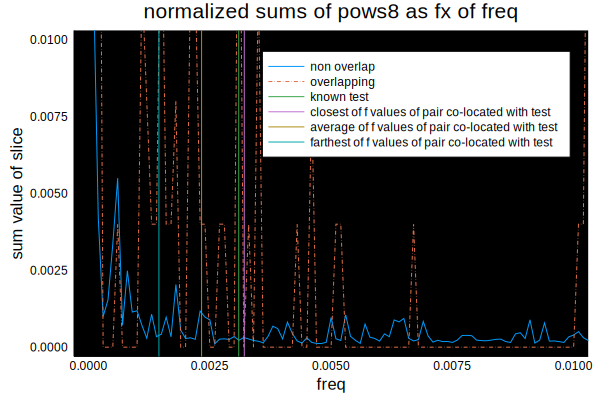

In [13]:
fRange8=genFRange(0.0001,pows8)
plot(fRange8,sums8./sum(sums8),title="normalized sums of pows8 as fx of freq",xlabel="freq",ylabel="sum value of slice",label="non overlap")
plot!(fRange8,sums8OVERLAP./sum(sums8OVERLAP),label="overlapping",linestyle=:dashdot,ylims=[0,0.01])
plot!(xlims=[0,0.01]) #this is for testing first result in checking_known_sources 
plot!([noMissing.pulse_period[x3]^-1],seriestype=:vline,label="known test")
plot!([x2Freq],seriestype=:vline,label="closest of f values of pair co-located with test")
plot!([(x1Freq+x2Freq)/2],seriestype=:vline,label="average of f values of pair co-located with test")
plot!([x1Freq],seriestype=:vline,label="farthest of f values of pair co-located with test")
plot!(background_color_inside=:black)

In [14]:
using Formatting
function genProbMatrix(powList)
    df=0.0001
    nk=ceil(maximum(powList.freq[:])/df)
    justPow=powList.power[:]    
    probMatrix=zeros(Int(nk),Int(ceil(maximum(justPow)-minimum(justPow))+1)) #freq num x pow range, +1 because min-min=0
    counter=0
    for i=1:length(justPow) #THIS DOES NOT ACCOUNT FOR PAIRS IN SAME PLACE
         print(format(i/length(justPow)*100,precision=2),"% complete part 1\r") #output % tracker
        freqInd=Int(ceil(powList.freq[i]/df))
        powInd=Int(ceil(powList.power[i]-minimum(powList.power[:])))+1 #+1 because index starts at 1
        probMatrix[freqInd,powInd]+=1
        counter+=1
    end
    
    #this accounts for pairs
    freqIndTrack=[] #set up to keep track of indices where we've already been
    powIndTrack=[]
    for i=1:length(justPow)
        print("\r")
        print(format(i/length(justPow)*100,precision=2),"% complete part 2\r") #output % tracker
        freq1Ind=Int(ceil(powList.freq[i]/df))
        pow1Ind=Int(ceil(powList.power[i]-minimum(powList.power[:])))+1 #+1 because min-min=0
        for j=i:(length(justPow)-1)#-1 because want i==j but still want pair not to be same src
            rdist=DJM.gcdist(powList.ra[j+1],powList.dec[j+1],powList.ra[i],powList.dec[i])
            if (60.0*rdist)<0.01666 #in the same place
                freq2Ind=Int(ceil(powList.freq[j+1]/df))
                pow2Ind=Int(ceil(powList.power[j+1]-minimum(powList.power[:])))+1 #+1 because min-min =0
                if j==i #so we only count i once
                    if freq1Ind in freqIndTrack && pow1Ind in powIndTrack && freq2Ind in freqIndTrack && pow2Ind in powIndTrack
                        continue
                    else
                        probMatrix[freq1Ind,pow1Ind]-=1 #take away one because it's a loc pair
                        probMatrix[freq2Ind,pow2Ind]-=1
                        counter-=2 #take 2 off counter
                        push!(freqIndTrack,freq1Ind) #add indices to our list 
                        push!(freqIndTrack,freq2Ind) #so that we don't oversubtract
                        push!(powIndTrack,pow1Ind)
                        push!(powIndTrack,pow2Ind)
                    end

                else
                    if freq2Ind in freqIndTrack && pow2Ind in powIndTrack
                        continue
                    else
                        probMatrix[freq2Ind,pow2Ind]-=1 
                        counter-=1
                        push!(freqIndTrack,freq2Ind)
                        push!(powIndTrack,pow2Ind)
                    end
                end
            end
        end
    end
    #this makes probabilities include greater than                            
    for i=1:length(probMatrix[:,1]) #num rows
        print("\r")
        print(format(i/length(probMatrix[:,1])*100,precision=2),"% complete part 3\r") #output % tracker
        currentRow=probMatrix[i,:]
        for j=1:length(currentRow) 
            probMatrix[i,j]+=sum(currentRow[(j+1):end]) #so each cell holds num >= to pow
        end
    end
    probMatrix=probMatrix./counter #rescales by dividing out total number of sources
    return probMatrix
end

genProbMatrix (generic function with 1 method)

In [15]:
prob8=genProbMatrix(pows8)

Excessive output truncated after 524291 bytes.

99.09

1546×1890 Array{Float64,2}:
 0.0634798    0.0634798    0.058843     …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0258335    0.0258335    0.0231839       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0166703    0.0166703    0.0140208       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.00872157   0.00872157   0.00596158      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.00287039   0.00287039   0.00198719      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.00209759   0.00209759   0.0012144    …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.00231839   0.00231839   0.0014352       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.00242879   0.00242879   0.001104        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0014352    0.0014352    0.001104        0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.00264959   0.00264959   0.00187679      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0186575    0.0186575    0.0155664    …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.00419519   0.00419519   0.00309119      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.000993597  0.000993597  0.000441599     0.0  

In [16]:
function genSRCExp(srcList,probList,powList,numTrials,df=0.0001)
    SRCExp=[]
    minPow=minimum(powList.power[:])
    for i=1:length(srcList)
        pow1Ind=first.(srcList[i])[1]
        pow2Ind=last.(srcList[i])[1]
        pow1=ceil(powList.power[pow1Ind])
        pow2=ceil(powList.power[pow2Ind])
        pow1ProbInd=Int(ceil(pow1-minPow)+1) #-minimum because of how probList is made
        pow2ProbInd=Int(ceil(pow2-minPow)+1) #+1 because index starts at 1
        freq1Ind=Int(ceil(powList.freq[pow1Ind]/df))
        freq2Ind=Int(ceil(powList.freq[pow2Ind]/df))
        #NOTE: probList occasionally has zero entries where no data was available--what should probability be here?
        expected=numTrials*probList[freq1Ind,pow1ProbInd]*probList[freq2Ind,pow2ProbInd]
        push!(SRCExp,expected)
    end
    return SRCExp
end

genSRCExp (generic function with 2 methods)

In [17]:
numTrials8=1546*250 #numfreq x numpairs
manip8=prob8
manip8=replace!(manip8,0=>1e3)
minNonZero=minimum(manip8) 
prob8NonZero=replace!(prob8,0=>minNonZero)#can't be zero chance even if we don't have data, so set zeros to min
test=genSRCExp(pows8src,prob8NonZero,pows8,numTrials8)

250-element Array{Any,1}:
      0.06594971168116992 
      0.056528324298145645
      0.04710693691512137 
      0.10363526121326702 
      0.06594971168116992 
      0.11776734228780342 
 213347.31728858466       
      0.1413208107453641  
      0.023553468457560685
  42669.463457716934      
      0.028264162149072822
      0.028264162149072822
      0.06594971168116992 
      ⋮                   
    172.58097408223867    
    251.51335757721603    
    387.9727324329396     
    357.2024812399823     
     91.15192293075985    
    132.84156210064228    
    204.91517558077797    
    188.6632823450611     
    190.98094364128508    
    498.3066000755369     
    110.8567546423551     
      0.042396243223609235

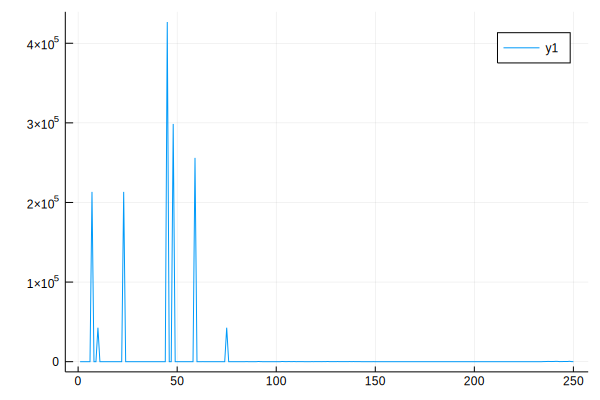

In [18]:
plot(test)

In [19]:
threshold=0.1 #if 0.02 18 accepted
acceptList=[]
for i=1:length(test)
    num=test[i]
    if num<threshold
        push!(acceptList,[num,i])
    end
end

In [20]:
acceptList

87-element Array{Any,1}:
 [0.0659497, 1.0]  
 [0.0565283, 2.0]  
 [0.0471069, 3.0]  
 [0.0659497, 5.0]  
 [0.0235535, 9.0]  
 [0.0282642, 11.0] 
 [0.0282642, 12.0] 
 [0.0659497, 13.0] 
 [0.0141321, 14.0] 
 [0.0329749, 15.0] 
 [0.0942139, 19.0] 
 [0.0235535, 20.0] 
 [0.0706604, 21.0] 
 ⋮                 
 [0.0282642, 210.0]
 [0.0706604, 212.0]
 [0.0141321, 214.0]
 [0.0565283, 218.0]
 [0.0659497, 219.0]
 [0.0141321, 220.0]
 [0.0659497, 221.0]
 [0.0141321, 222.0]
 [0.0565283, 225.0]
 [0.0376855, 226.0]
 [0.0565283, 233.0]
 [0.0423962, 250.0]

In [21]:
srcInd=Int(acceptList[1][2])
pow1Ind=pows8src[srcInd][1][1]
pow2Ind=pows8src[srcInd][1][2]

508

# making folded LCs out of accepted list

In [22]:
acceptList

87-element Array{Any,1}:
 [0.0659497, 1.0]  
 [0.0565283, 2.0]  
 [0.0471069, 3.0]  
 [0.0659497, 5.0]  
 [0.0235535, 9.0]  
 [0.0282642, 11.0] 
 [0.0282642, 12.0] 
 [0.0659497, 13.0] 
 [0.0141321, 14.0] 
 [0.0329749, 15.0] 
 [0.0942139, 19.0] 
 [0.0235535, 20.0] 
 [0.0706604, 21.0] 
 ⋮                 
 [0.0282642, 210.0]
 [0.0706604, 212.0]
 [0.0141321, 214.0]
 [0.0565283, 218.0]
 [0.0659497, 219.0]
 [0.0141321, 220.0]
 [0.0659497, 221.0]
 [0.0141321, 222.0]
 [0.0565283, 225.0]
 [0.0376855, 226.0]
 [0.0565283, 233.0]
 [0.0423962, 250.0]

In [71]:
fileInfo=zeros(length(acceptList)*2,2) #times two because each is pair
counter=1
i=1
while i<2*length(acceptList)
    srcListPlace=Int(acceptList[counter][2])
    powListPlace1=Int(pows8src[srcListPlace][1][1])
    powListPlace2=Int(pows8src[srcListPlace][1][2])
    fileInfo[i,1]=pows8.obsid[powListPlace1]
    fileInfo[i,2]=pows8.srcnum[powListPlace1]
    fileInfo[i+1,1]=pows8.obsid[powListPlace2]
    fileInfo[i+1,2]=pows8.srcnum[powListPlace2]
    i+=2
    counter+=1
end

In [31]:
pows8src[1][1][1]

65

In [40]:
x=Int(acceptList[1][2])
fileInfo[1,2]

0.0

In [72]:
fileInfo

174×2 Array{Float64,2}:
 10985.0   6.0
 12130.0  10.0
 10985.0   6.0
 12130.0  10.0
 10985.0   6.0
 12130.0  10.0
 10985.0   7.0
 12130.0  11.0
 11095.0   4.0
 12215.0   6.0
 11095.0   4.0
 12215.0   6.0
 11981.0  10.0
     ⋮        
  7156.0  28.0
  8481.0  12.0
  7156.0  28.0
  8481.0  12.0
  7156.0  29.0
  8481.0  13.0
  7156.0  29.0
  8481.0  13.0
   953.0  13.0
   955.0  11.0
   953.0  49.0
   955.0  47.0

In [75]:
pows8src[250]
pows8.obsid[11010]

953

In [76]:
using DelimitedFiles

In [78]:
fileInt=Int.(fileInfo)

174×2 Array{Int64,2}:
 10985   6
 12130  10
 10985   6
 12130  10
 10985   6
 12130  10
 10985   7
 12130  11
 11095   4
 12215   6
 11095   4
 12215   6
 11981  10
     ⋮    
  7156  28
  8481  12
  7156  28
  8481  12
  7156  29
  8481  13
  7156  29
  8481  13
   953  13
   955  11
   953  49
   955  47

In [79]:
writedlm("obsid_src_test.txt",fileInt,", ")